# Project: 
## Data Analysis - COVID-19

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc

### Import the Data, and selecting some useful parts

In [12]:
dataset = 'C:/Programming/KS5 Computing/NEA/COVID_Stats2.xlsx'

totalDeaths = pd.read_excel(dataset,sheet_name=4,index_col=1)
totalDeaths = totalDeaths.iloc[20:40]
totalDeaths = totalDeaths.dropna(axis=1)

covidDeaths = pd.read_excel(dataset,sheet_name=6,index_col=1)
covidDeaths = covidDeaths.iloc[10:30]
covidDeaths = covidDeaths.dropna(axis=1)

### Renaming the column headings
##### 'dates' had to be used as the dates were cut from the other dataframes when resizing them  

In [13]:
j = 1
dates = pd.read_excel(dataset,sheet_name=4,index_col=1)
for i in totalDeaths:
    date = str(dates.iloc[4][j])
    totalDeaths.rename(columns={i:date[:11]},inplace=True)
    covidDeaths.rename(columns={i:date[:11]},inplace=True)
    j += 1
covidDeaths.rename(columns={'Unnamed: 47' :'All Weeks'},inplace=True)

### Adding columns with summary statistics
##### 'temp' is used to calculate the mean and standard deviation without the total sum affecting it

In [14]:
temp = totalDeaths.iloc[: ,: -1]
totalDeaths['All Weeks'] = totalDeaths.sum(axis=1)
totalDeaths['Mean Deaths per Week'] = temp.mean(axis=1)
totalDeaths['Mean Deaths per Week'] = round(totalDeaths['Mean Deaths per Week'], 1)
totalDeaths['Standard Deviation'] = temp.std(axis=1)
totalDeaths['Standard Deviation'] = round(totalDeaths['Standard Deviation'], 2)

temp = covidDeaths.iloc[:, :-1]
covidDeaths['Mean Deaths per Week'] = temp.mean(axis=1)
covidDeaths['Mean Deaths per Week'] = round(covidDeaths['Mean Deaths per Week'], 2)
covidDeaths['Standard Deviation'] = temp.std(axis=1)
covidDeaths['Standard Deviation'] = round(covidDeaths['Standard Deviation'], 2)

### Plotting 'All Weeks' in bar charts
##### 'frames' is used to select the 'All Weeks' columns from the two dataframes, to concatenate them into one dataframe to be plotted

<AxesSubplot:title={'center':'All Deaths Compared to COVID-19 Related Deaths'}>

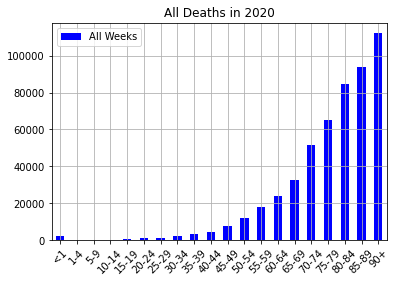

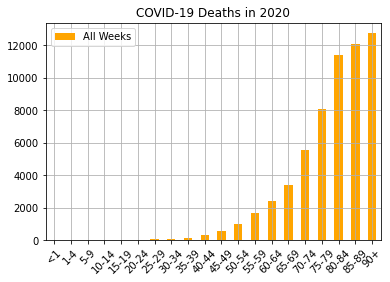

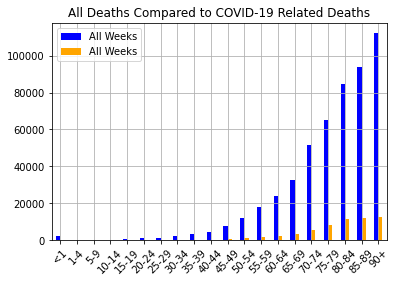

In [15]:
totalDeaths.plot.bar(title='All Deaths in 2020',y='All Weeks',rot=45,color='Blue',grid=True)
covidDeaths.plot.bar(title='COVID-19 Deaths in 2020',y='All Weeks', rot=45,color='orange',grid=True)

frames = [totalDeaths['All Weeks'], covidDeaths['All Weeks']]
barChart = pd.concat(frames,axis=1,join='outer')
barChart.plot.bar(title='All Deaths Compared to COVID-19 Related Deaths',y='All Weeks',rot=45,color=['blue','orange'],grid=True)

### Plotting a box plot
##### This shows that for most age groups, the total deaths involving COVID-19 is quite low, however there are three which are considerably higher than the rest

<AxesSubplot:title={'center':'Box plot of COVID-19 Deaths'}>

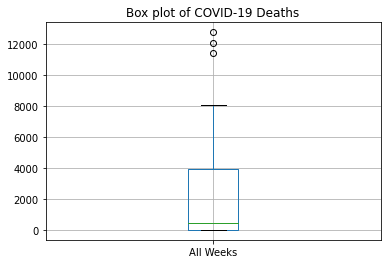

In [16]:
covidDeaths['All Weeks'].plot.box(title='Box plot of COVID-19 Deaths',grid=True)

### Adding a row with the total deaths per week

In [17]:
temp = covidDeaths.iloc[0:1,:]
temp = temp.rename(index={'<1':'Total per Week'})
for week in covidDeaths:
    weekTotal = 0
    for count in range(len(covidDeaths)):
        weekTotal += covidDeaths[week][count]
    temp[week][0] = weekTotal
covidDeaths = covidDeaths.append(temp,ignore_index=True)
covidDeaths.iloc[-1:, -2:] = 0

c:\programming\ks5 computing\nea\project code\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Using simple linear regression

In [18]:
#placeholding

## Data from NHS website on Mechanical Ventilator Beds
### Importing some of that data 

In [19]:
dataset2 = 'C:/Programming/KS5 Computing/NEA/COVID_Hospital_Data.xlsx'

MV_Beds = pd.read_excel(dataset2,sheet_name=6,index_col=3)
MV_Beds = MV_Beds.iloc[16:23]
MV_Beds = MV_Beds.dropna(axis=1)

In [22]:
dates = pd.read_excel(dataset2,sheet_name=6)
dates = dates.iloc[13,4:]

for i in range(len(dates)):
    date = str(dates[i])
    

    

2020-08-01 00:00:00
2020-08-02 00:00:00
2020-08-03 00:00:00
2020-08-04 00:00:00
2020-08-05 00:00:00
2020-08-06 00:00:00
2020-08-07 00:00:00
2020-08-08 00:00:00
2020-08-09 00:00:00
2020-08-10 00:00:00
2020-08-11 00:00:00
2020-08-12 00:00:00
2020-08-13 00:00:00
2020-08-14 00:00:00
2020-08-15 00:00:00
2020-08-16 00:00:00
2020-08-17 00:00:00
2020-08-18 00:00:00
2020-08-19 00:00:00
2020-08-20 00:00:00
2020-08-21 00:00:00
2020-08-22 00:00:00
2020-08-23 00:00:00
2020-08-24 00:00:00
2020-08-25 00:00:00
2020-08-26 00:00:00
2020-08-27 00:00:00
2020-08-28 00:00:00
2020-08-29 00:00:00
2020-08-30 00:00:00
2020-08-31 00:00:00
2020-09-01 00:00:00
2020-09-02 00:00:00
2020-09-03 00:00:00
2020-09-04 00:00:00
2020-09-05 00:00:00
2020-09-06 00:00:00
2020-09-07 00:00:00
2020-09-08 00:00:00
2020-09-09 00:00:00
2020-09-10 00:00:00
2020-09-11 00:00:00
2020-09-12 00:00:00
2020-09-13 00:00:00
2020-09-14 00:00:00
2020-09-15 00:00:00
2020-09-16 00:00:00
2020-09-17 00:00:00
2020-09-18 00:00:00
2020-09-19 00:00:00
